# Skin Cancer Detection models 🩺 | CNN, NN and Softmax

#### Prologue
This notebook explores melanoma classification using machine learning.
The objective is **construct** and **analyze** three models: a neural network, softmax regression, and a CNN.

#### Dataset Overview
Comprising 13,900 uniformly-sized images at 224 x 224 pixels, which provides a comprehensive portrayal of diverse manifestations of melanoma. Each image is meticulously labeled as either `benign` or `malignant`.

In [46]:
import os
import random
#----------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#----------
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score, precision_score, recall_score
#----------
import matplotlib.pyplot as plt
#----------
import numpy as np
#----------
import warnings
warnings.filterwarnings('ignore')

## Load and preprocess the dataset

In [2]:
# Path to the dataset archive
archive_path = r'parth\to\archive'

In [3]:
# Define the main folder path after extraction
main_folder_path = os.path.splitext(archive_path)[0]  # Remove the extension

The main folder contains 2 folders - train and test - and each of them conatins 2 folder - Benign and Malignant

In [4]:
# Define subfolders
data_folders = ["train", "test"]
class_folders = ["Benign", "Malignant"]

In [5]:
# Paths for train and test data
train_data_path = os.path.join(main_folder_path, data_folders[0])
test_data_path = os.path.join(main_folder_path, data_folders[1])

Set those hyperparamaters as you wish

In [36]:
img_width, img_height = 112, 112 
batch_size = 128
epochs = 15

In [37]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Samples Examples

In [38]:
# Display information about the dataset
shapes = np.shape(train_generator[0][0])
print("A batch contains", shapes[0], "samples of", shapes[1], "x", shapes[2], "x", shapes[3])

A batch contains 128 samples of 112 x 112 x 3


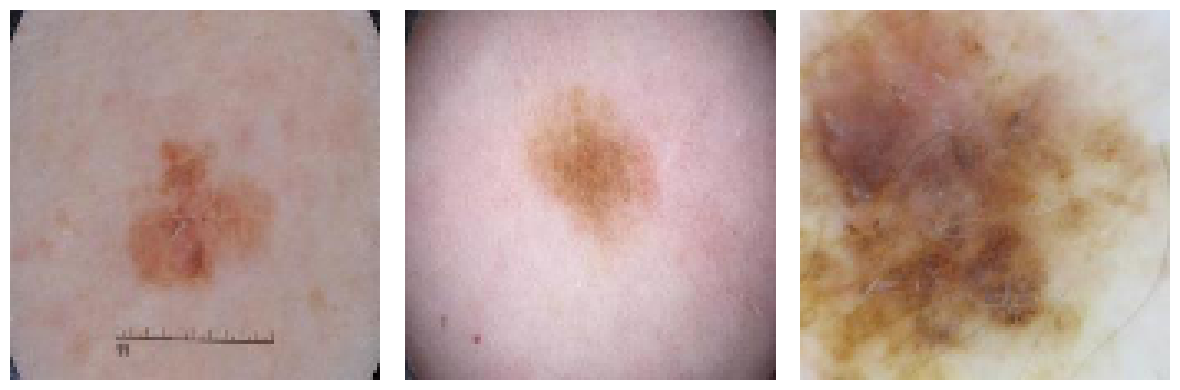

In [39]:
# Select 3 random indices from the list
random_indices = random.sample(range(len(train_generator)), 3)

# Display the selected images in a 3x1 grid
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, index in enumerate(random_indices):
    # Show each image
    image = train_generator[index][0][0]
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Models

This section involves constructing three models: a Neural Network (NN), Softmax Regression, and Convolutional Neural Network (CNN). Each model is analyzed individually, followed by a comparative evaluation to discern their respective performance characteristics.

## Neural Network 

### Creation

In [40]:
def create_nn(num_hidden_layers, hidden_layer_sizes):
    """
    Create a neural network with dynamic hidden layers.

    Parameters:
    - num_hidden_layers: Integer specifying the number of hidden layers for each set of sizes.
    - hidden_layer_size: List of integers specifying the size of each hidden layer.
    """
    model = Sequential()
    
    # Flatten the input data
    model.add(Flatten(input_shape=(img_width, img_height, 3)))

    # Add hidden layers
    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(hidden_layer_sizes[i], activation='relu'))
            
    # Output layer with binary classification
    model.add(Dense(1, activation='sigmoid')) 

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [41]:
# Define NN sizes
hidden_layer_sizes = [64, 32, 32]
num_hidden_layers = len(hidden_layer_sizes)

# Get the NN model
nn_model = create_nn(num_hidden_layers, hidden_layer_sizes)

# Display the model architecture
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 37632)             0         
                                                                 
 dense_11 (Dense)            (None, 64)                2408512   
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2411681 (9.20 MB)
Trainable params: 2411681 (9.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# Compile model
nn_model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Training and evaluating

In [43]:
history = nn_model.fit(train_generator, epochs=epochs, validation_data=test_generator)

# Evaluate the model
test_loss, test_acc = nn_model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

Epoch 1/15
93/93 [==============================] - 54s 573ms/step - loss: 0.7976 - accuracy: 0.6184 - val_loss: 0.5673 - val_accuracy: 0.6855
Epoch 2/15
93/93 [==============================] - 35s 381ms/step - loss: 0.5580 - accuracy: 0.7164 - val_loss: 0.5463 - val_accuracy: 0.6945
Epoch 3/15
93/93 [==============================] - 32s 342ms/step - loss: 0.4801 - accuracy: 0.7706 - val_loss: 0.4685 - val_accuracy: 0.7655
Epoch 4/15
93/93 [==============================] - 29s 314ms/step - loss: 0.4650 - accuracy: 0.7810 - val_loss: 0.5203 - val_accuracy: 0.7530
Epoch 5/15
93/93 [==============================] - 47s 506ms/step - loss: 0.4917 - accuracy: 0.7687 - val_loss: 0.4289 - val_accuracy: 0.7980
Epoch 6/15
93/93 [==============================] - 79s 858ms/step - loss: 0.4517 - accuracy: 0.7913 - val_loss: 0.4758 - val_accuracy: 0.7395
Epoch 7/15
93/93 [==============================] - 60s 642ms/step - loss: 0.4382 - accuracy: 0.7964 - val_loss: 0.5035 - val_accuracy: 0.7320

### Training Results

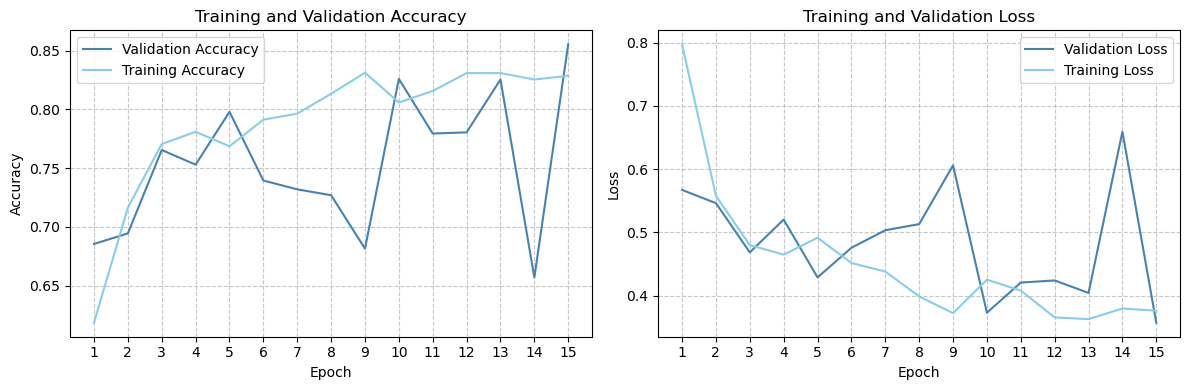

In [44]:
# Plot training and validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='Validation Accuracy', color="steelblue")
plt.plot(np.arange(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='Training Accuracy', color="skyblue")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(history.history['accuracy']) + 1))
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Validation Loss', color="steelblue")
plt.plot(np.arange(1, len(history.history['loss']) + 1), history.history['loss'], label='Training Loss', color="skyblue")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(history.history['loss']) + 1))
plt.legend()

plt.tight_layout()
plt.show()

### Model Evaluation Metrics

In [60]:
# Evaluate the model on the test data and get predictions
predicted_probabilities = nn_model.predict(test_generator)

# Convert probabilities to binary predictions (0 or 1)
predicted_labels = np.round(predicted_probabilities).astype(np.int32)

# Get true labels
true_labels = test_generator.classes

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(true_labels, predicted_labels)

# Calculate Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate Precision
precision = precision_score(true_labels, predicted_labels)

# Calculate Recall
recall = recall_score(true_labels, predicted_labels)

print(f'MSE:       {mse:.5f}')
print(f'Accuracy:  {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall:    {recall:.5f}')

16/16 [==============================] - 3s 186ms/step
MSE:       0.14450
Accuracy:  0.85550
Precision: 0.81769
Recall:    0.91500


### Classification Report

In [50]:
# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=["Benign", "Malignant"])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Benign       0.90      0.80      0.85      1000
   Malignant       0.82      0.92      0.86      1000

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.85      2000
weighted avg       0.86      0.86      0.85      2000



### Confution Matirx

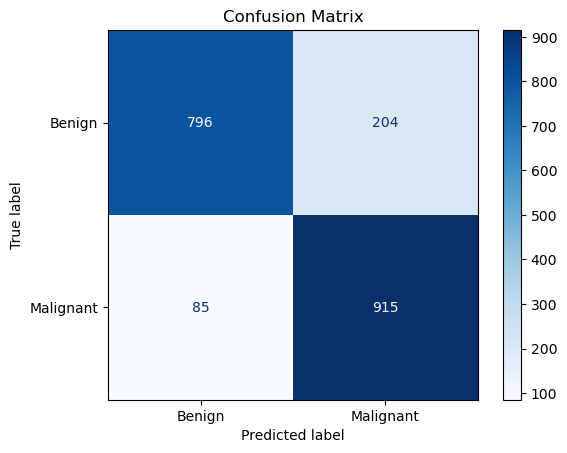

In [51]:
# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

## Softmax Regression

### Creation

In [52]:
def create_softmax_model(input_shape, num_classes):
    """
    Create a softmax regression model.

    Parameters:
    - input_shape: Tuple, shape of the input data (e.g., (height, width, channels)).
    - num_classes: Integer, number of classes for classification.

    Returns:
    - softmax_model: Compiled softmax regression model.
    """
    softmax_model = Sequential()
  
    # Add an input layer with the specified input shape
    softmax_model.add(tf.keras.Input(shape=input_shape))

    # Flatten the input
    softmax_model.add(tf.keras.layers.Flatten())

    # Add a dense layer with the number of classes
    softmax_model.add(tf.keras.layers.Dense(num_classes))
    
    # Apply softmax activation to the output layer
    softmax_model.add(tf.keras.layers.Softmax())
    
    # Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
    softmax_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

    return softmax_model

In [53]:
# Model parameters
input_shape = (img_width, img_height, 3)
num_classes = 2

In [54]:
# Get model
softmax_model = create_softmax_model(input_shape, num_classes)

# Display the model architecture
softmax_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 37632)             0         
                                                                 
 dense_15 (Dense)            (None, 2)                 75266     
                                                                 
 softmax (Softmax)           (None, 2)                 0         
                                                                 
Total params: 75266 (294.01 KB)
Trainable params: 75266 (294.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training and evaluating

In [55]:
# Train
softmax_history = softmax_model.fit(
  train_generator,
  epochs=epochs,
  validation_data=test_generator  
)

# Evaluate
test_loss, test_acc = softmax_model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Epoch 1/15
93/93 [==============================] - 66s 705ms/step - loss: 1.8939 - accuracy: 0.6011 - val_loss: 1.0508 - val_accuracy: 0.5545
Epoch 2/15
93/93 [==============================] - 20s 219ms/step - loss: 0.5996 - accuracy: 0.7117 - val_loss: 0.5335 - val_accuracy: 0.7380
Epoch 3/15
93/93 [==============================] - 23s 252ms/step - loss: 0.5848 - accuracy: 0.7275 - val_loss: 0.5939 - val_accuracy: 0.6775
Epoch 4/15
93/93 [==============================] - 21s 228ms/step - loss: 0.6552 - accuracy: 0.7150 - val_loss: 0.6392 - val_accuracy: 0.6685
Epoch 5/15
93/93 [==============================] - 21s 221ms/step - loss: 0.6363 - accuracy: 0.7248 - val_loss: 0.5190 - val_accuracy: 0.7360
Epoch 6/15
93/93 [==============================] - 21s 222ms/step - loss: 0.6215 - accuracy: 0.7371 - val_loss: 0.5167 - val_accuracy: 0.7365
Epoch 7/15
93/93 [==============================] - 21s 228ms/step - loss: 0.6104 - accuracy: 0.7411 - val_loss: 1.0054 - val_accuracy: 0.6040

### Training Results

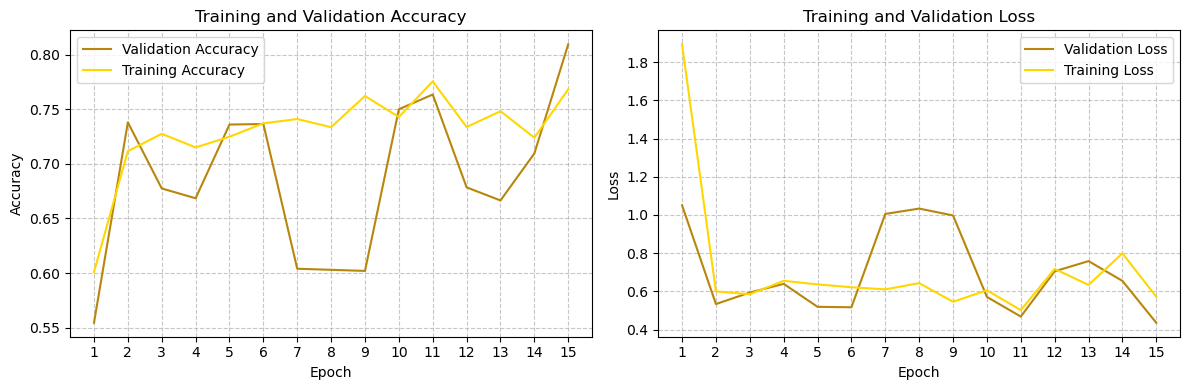

In [56]:
# Plot training and validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(softmax_history.history['val_accuracy']) + 1), softmax_history.history['val_accuracy'], label='Validation Accuracy', color='darkgoldenrod')
plt.plot(np.arange(1, len(softmax_history.history['accuracy']) + 1), softmax_history.history['accuracy'], label='Training Accuracy', color='gold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(softmax_history.history['val_accuracy']) + 1))
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(softmax_history.history['val_loss']) + 1), softmax_history.history['val_loss'], label='Validation Loss', color='darkgoldenrod')
plt.plot(np.arange(1, len(softmax_history.history['loss']) + 1), softmax_history.history['loss'], label='Training Loss', color='gold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(softmax_history.history['val_loss']) + 1))
plt.legend()

plt.tight_layout()
plt.show()

### Model Evaluation Metrics

In [68]:
# Evaluate the model on the test data and get predictions
predicted_probabilities = softmax_model.predict(test_generator)

# Convert probabilities to binary predictions (0 or 1)
predicted_labels = np.round(predicted_probabilities).astype(np.int32)[:, 1]  # [:, 0] is the probabily to mistake.

# Get true labels
true_labels = test_generator.classes

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(true_labels, predicted_labels)

# Calculate Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate Precision
precision = precision_score(true_labels, predicted_labels)

# Calculate Recall
recall = recall_score(true_labels, predicted_labels)

print(f'MSE:       {mse:.5f}')
print(f'Accuracy:  {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall:    {recall:.5f}')

16/16 [==============================] - 3s 176ms/step
MSE:       0.19050
Accuracy:  0.80950
Precision: 0.82821
Recall:    0.78100


### Classification Report

In [69]:
# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=["Benign", "Malignant"])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Benign       0.79      0.84      0.81      1000
   Malignant       0.83      0.78      0.80      1000

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



### Confusion Matrix

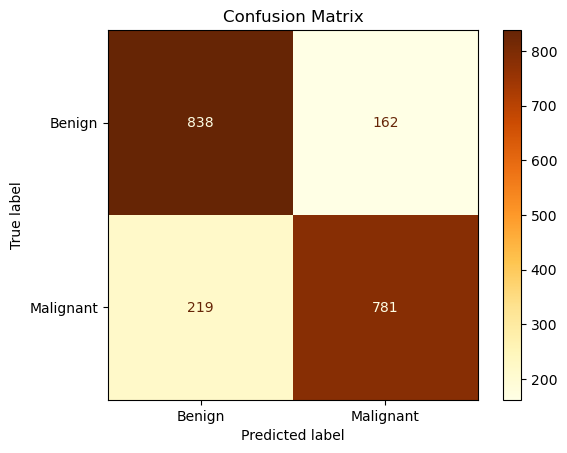

In [74]:
# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap='YlOrBr', values_format='d')
plt.title("Confusion Matrix")
plt.show()

## Convolutional Neural Network

### Creation

In [75]:
def create_cnn_model(input_shape, num_classes, 
                    conv_layers=2, 
                    conv_filters=32,
                    conv_kernel_size=(3,3),
                    conv_activation='relu',
                    pool_size=(2,2)):


    # Create sequential model
    cnn_model = Sequential()
    
    # Add input layer
    cnn_model.add(Conv2D(conv_filters, kernel_size=conv_kernel_size, activation=conv_activation, input_shape=input_shape))
    cnn_model.add(MaxPooling2D(pool_size=pool_size))

    # Add convolutional layers
    for i in range(conv_layers):
        cnn_model.add(Conv2D(conv_filters, 
                             kernel_size=conv_kernel_size, 
                             activation=conv_activation))
        cnn_model.add(MaxPooling2D(pool_size=pool_size))

    # Fully connected layer 
    cnn_model.add(Flatten())
    cnn_model.add(Dense(num_classes, activation='sigmoid'))

    # Compile model
    cnn_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
  
    return cnn_model

In [76]:
# Model parameters
input_shape = (img_width, img_height, 3)
num_classes = 1

In [77]:
# Get model
cnn_model = create_cnn_model(input_shape, num_classes)

# Display the model architecture
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 55, 55, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 26, 26, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)       

### Training and evaluating

In [78]:
# Train
cnn_history = cnn_model.fit(
  train_generator,
  epochs=epochs,
  validation_data=test_generator  
)

# Evaluate
test_loss, test_acc = cnn_model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Epoch 1/15
93/93 [==============================] - 113s 1s/step - loss: 0.5166 - accuracy: 0.7331 - val_loss: 0.5761 - val_accuracy: 0.6650
Epoch 2/15
93/93 [==============================] - 79s 851ms/step - loss: 0.4299 - accuracy: 0.8011 - val_loss: 0.4178 - val_accuracy: 0.8100
Epoch 3/15
93/93 [==============================] - 76s 820ms/step - loss: 0.3737 - accuracy: 0.8299 - val_loss: 0.4105 - val_accuracy: 0.7930
Epoch 4/15
93/93 [==============================] - 78s 833ms/step - loss: 0.3563 - accuracy: 0.8389 - val_loss: 0.4147 - val_accuracy: 0.7945
Epoch 5/15
93/93 [==============================] - 75s 801ms/step - loss: 0.3399 - accuracy: 0.8486 - val_loss: 0.3493 - val_accuracy: 0.8345
Epoch 6/15
93/93 [==============================] - 89s 959ms/step - loss: 0.3314 - accuracy: 0.8537 - val_loss: 0.3369 - val_accuracy: 0.8460
Epoch 7/15
93/93 [==============================] - 77s 827ms/step - loss: 0.3218 - accuracy: 0.8602 - val_loss: 0.3358 - val_accuracy: 0.8450
E

### Training Results

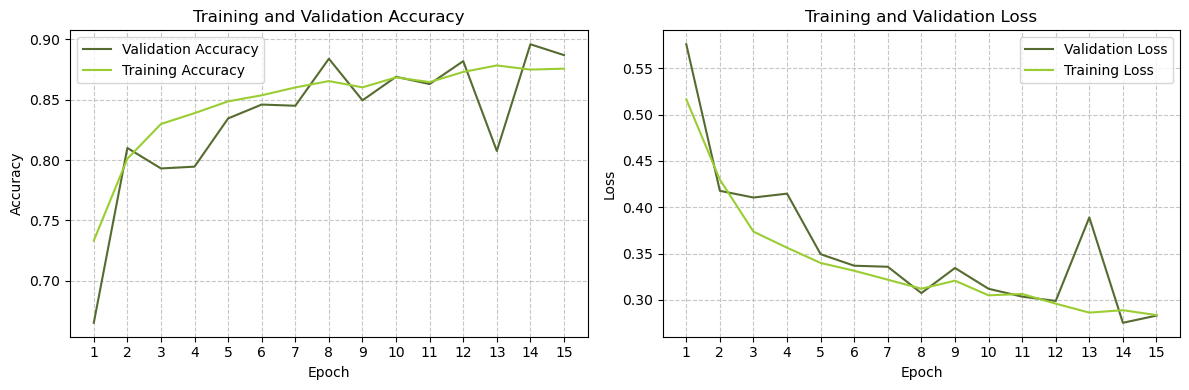

In [80]:
# Plot training and validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(cnn_history.history['val_accuracy']) + 1), cnn_history.history['val_accuracy'], label='Validation Accuracy', color='darkolivegreen')
plt.plot(np.arange(1, len(cnn_history.history['accuracy']) + 1), cnn_history.history['accuracy'], label='Training Accuracy', color='yellowgreen')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(cnn_history.history['val_accuracy']) + 1))
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(cnn_history.history['val_loss']) + 1), cnn_history.history['val_loss'], label='Validation Loss', color='darkolivegreen')
plt.plot(np.arange(1, len(cnn_history.history['loss']) + 1), cnn_history.history['loss'], label='Training Loss', color='yellowgreen')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(cnn_history.history['val_loss']) + 1))
plt.legend()

plt.tight_layout()
plt.show()

### Model Evaluation Metrics

In [89]:
# Evaluate the model on the test data and get predictions
predicted_probabilities = cnn_model.predict(test_generator)

# Convert probabilities to binary predictions (0 or 1)
predicted_labels = np.round(predicted_probabilities).astype(np.int32)[:, 0]  # [:, 0] is the probabily to mistake.

# Get true labels
true_labels = test_generator.classes

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(true_labels, predicted_labels)

# Calculate Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate Precision
precision = precision_score(true_labels, predicted_labels)

# Calculate Recall
recall = recall_score(true_labels, predicted_labels)

print(f'MSE:       {mse:.5f}')
print(f'Accuracy:  {accuracy:.5f}')
print(f'Precision: {precision:.5f}')
print(f'Recall:    {recall:.5f}')

16/16 [==============================] - 5s 289ms/step
MSE:       0.11300
Accuracy:  0.88700
Precision: 0.87427
Recall:    0.90400


### Classification Report

In [90]:
# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=["Benign", "Malignant"])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      Benign       0.90      0.87      0.89      1000
   Malignant       0.87      0.90      0.89      1000

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



### Confusion Matrix

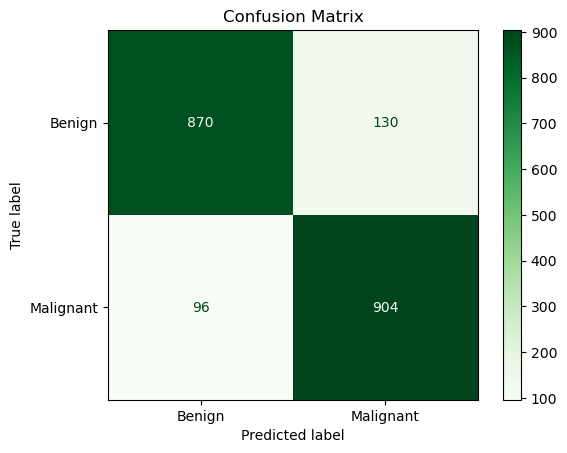

In [91]:
# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix")
plt.show()

## Comparation

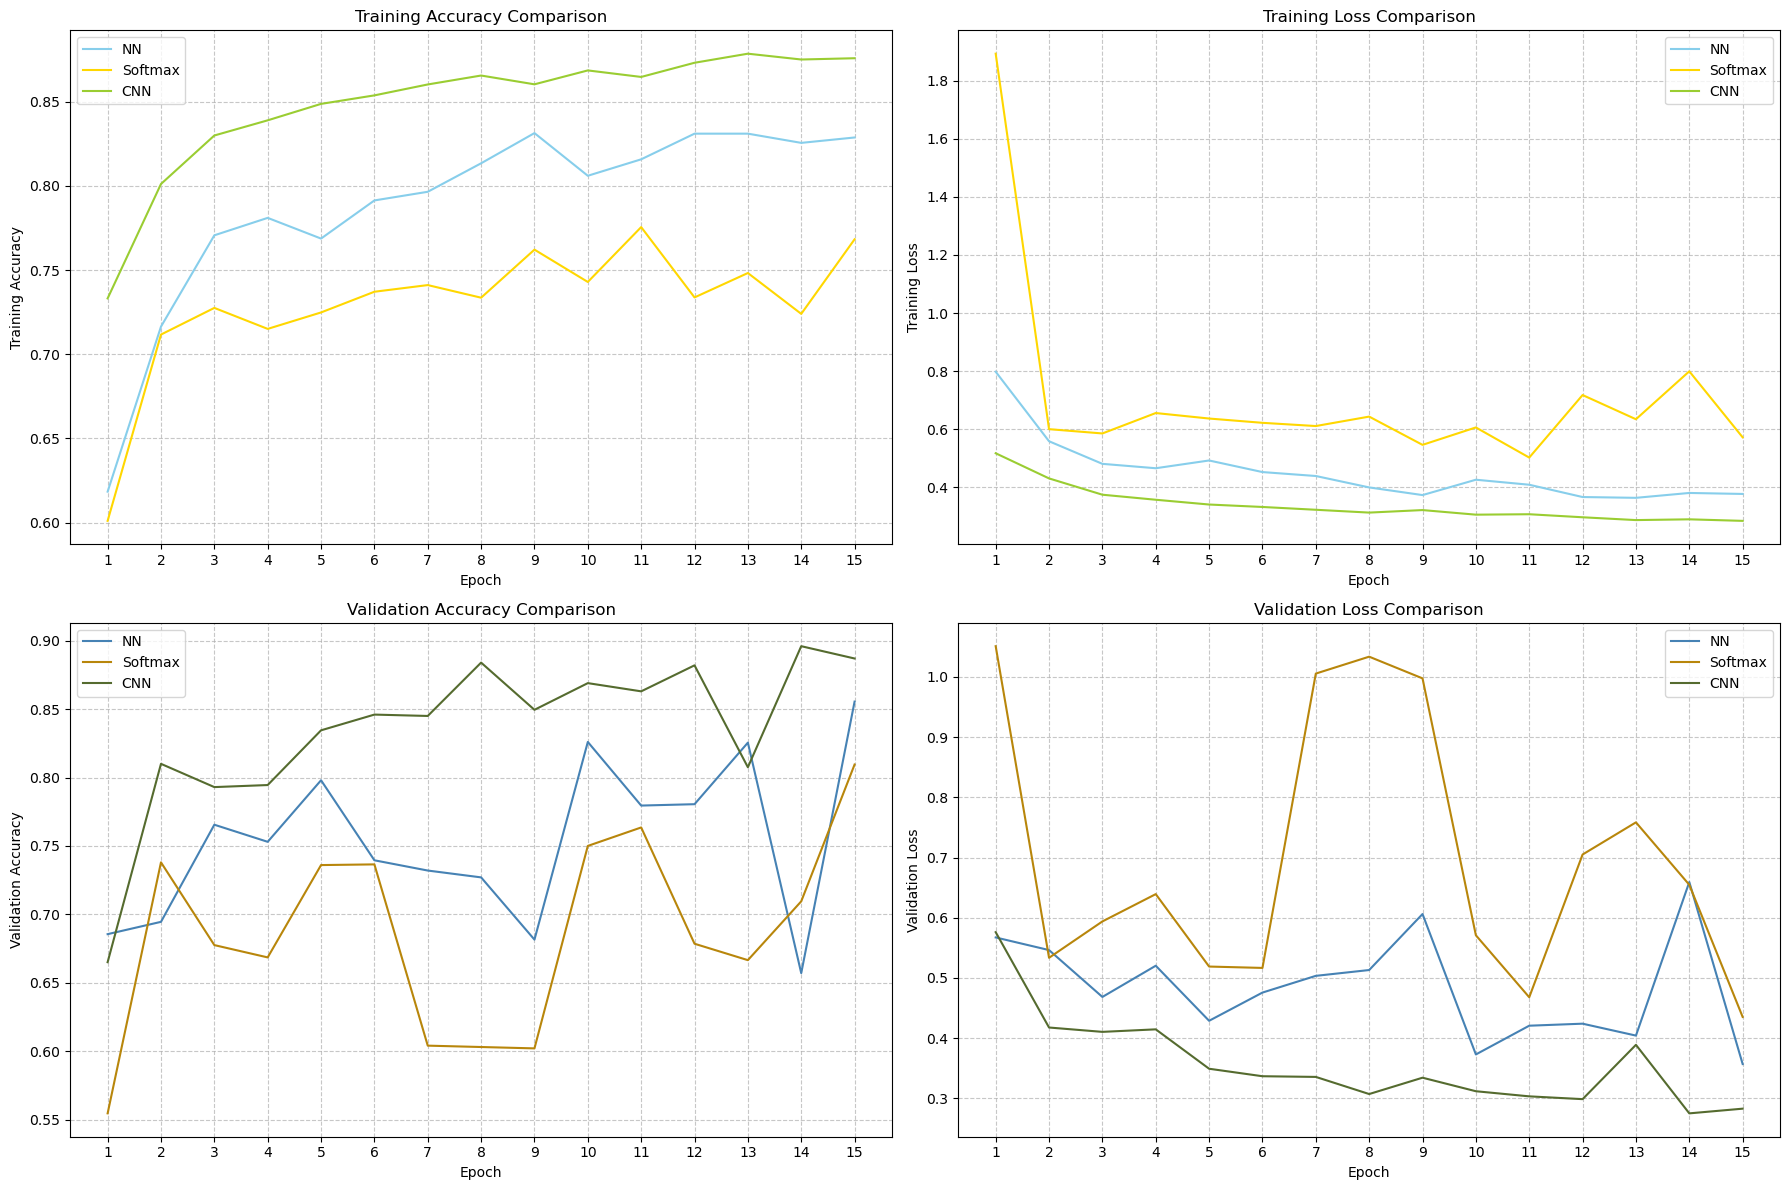

In [85]:
# Create a figure with 4 subplots
plt.figure(figsize=(18, 12))

# Comparison of Training Accuracy for all models
plt.subplot(2, 2, 1)
plt.plot(np.arange(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='NN', color="skyblue")
plt.plot(np.arange(1, len(softmax_history.history['accuracy']) + 1), softmax_history.history['accuracy'], label='Softmax', color='gold')
plt.plot(np.arange(1, len(cnn_history.history['accuracy']) + 1), cnn_history.history['accuracy'], label='CNN', color='yellowgreen')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Comparison')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(history.history['accuracy']) + 1))
plt.legend()

# Comparison of Training Loss for all models
plt.subplot(2, 2, 2)
plt.plot(np.arange(1, len(history.history['loss']) + 1), history.history['loss'], label='NN', color="skyblue")
plt.plot(np.arange(1, len(softmax_history.history['loss']) + 1), softmax_history.history['loss'], label='Softmax', color='gold')
plt.plot(np.arange(1, len(cnn_history.history['loss']) + 1), cnn_history.history['loss'], label='CNN', color='yellowgreen')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(history.history['loss']) + 1))
plt.legend()

# Comparison of Validation Accuracy for all models
plt.subplot(2, 2, 3)
plt.plot(np.arange(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='NN', color="steelblue")
plt.plot(np.arange(1, len(softmax_history.history['val_accuracy']) + 1), softmax_history.history['val_accuracy'], label='Softmax', color='darkgoldenrod')
plt.plot(np.arange(1, len(cnn_history.history['val_accuracy']) + 1), cnn_history.history['val_accuracy'], label='CNN', color='darkolivegreen')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(history.history['val_accuracy']) + 1))
plt.legend()

# Comparison of Validation Loss for all models
plt.subplot(2, 2, 4)
plt.plot(np.arange(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='NN', color="steelblue")
plt.plot(np.arange(1, len(softmax_history.history['val_loss']) + 1), softmax_history.history['val_loss'], label='Softmax', color='darkgoldenrod')
plt.plot(np.arange(1, len(cnn_history.history['val_loss']) + 1), cnn_history.history['val_loss'], label='CNN', color='darkolivegreen')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Comparison')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, len(history.history['val_loss']) + 1))
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the combined plot
plt.show()

# Report

## Prediction Results

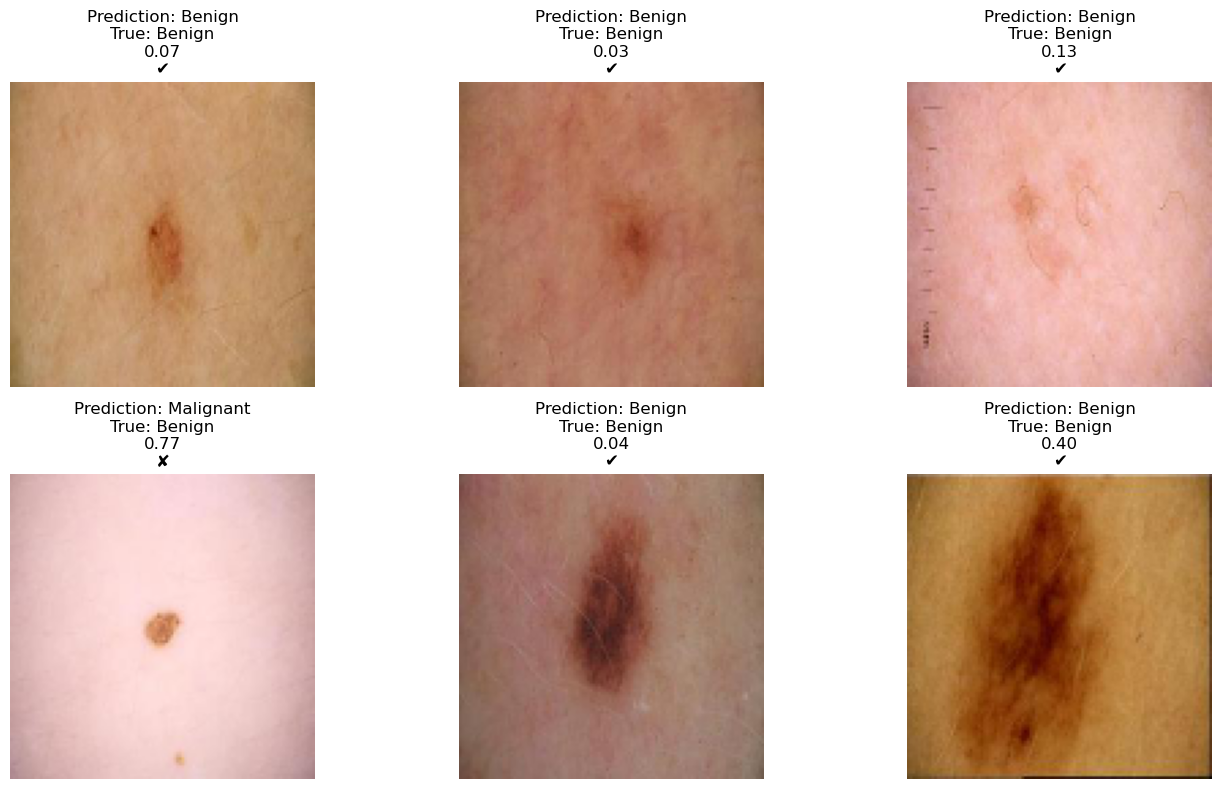

In [127]:
# Get a batch of images and labels from the test generator
batch_images, batch_labels = test_generator.next()

# Select 6 random indices from the batch
random_indices = np.random.choice(len(batch_labels), 6, replace=False)

# Create a figure with 2 rows and 3 columns
plt.figure(figsize=(14, 8))

# Display images with predicted and true labels
for i, index in enumerate(random_indices, start=1):
    plt.subplot(2, 3, i)
    plt.imshow(batch_images[index])
    plt.axis('off')
    
    # Determine the predicted class based on a threshold (e.g., 0.5)
    predicted_class = 1 if predicted_probabilities[index][0] >= 0.5 else 0
    
    # Check if the prediction is correct
    is_correct = predicted_class == batch_labels[index]
    
    # Use checkmark (✔) for correct and cross (✘) for incorrect
    sign = "✔" if is_correct else "✘"
    
    # Display prediction probability, predicted class, and true class
    plt.title(f"Prediction: {'Malignant' if predicted_class == 1 else 'Benign'}\nTrue: {'Malignant' if batch_labels[index] == 1 else 'Benign'}\n{predicted_probabilities[index][0]:.2f}\n{sign}")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()